In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [5]:
batchsize=16
train_folder = "../prepared_data/train"
test_folder = "../prepared_data/test"
model_folder = "./models/"

In [10]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2, horizontal_flip=True, vertical_flip=True)

train_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 61516 images belonging to 2 classes.
Found 15378 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(test_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 8005 images belonging to 2 classes.


In [12]:
basemodel = Xception(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = basemodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=basemodel.input, outputs= hmodel)
for layer in basemodel.layers:
    layer.trainable = False

In [ ]:
model.summary()

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [14]:
checkpoint = ModelCheckpoint(f'{model_folder}xception_model0413.h5',
                            monitor='val_loss',save_best_only=True,verbose=2)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 2, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor = 'val_loss', patience=3, verbose= 2,)

callbacks=[checkpoint,earlystop,learning_rate]

In [15]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=5)

Epoch 1/5
3844/3844 [==============================] - ETA: 0s - loss: 0.2706 - accuracy: 0.8902
Epoch 1: val_loss improved from inf to 0.29461, saving model to ./models/xception_model0413.h5
3844/3844 [==============================] - 967s 251ms/step - loss: 0.2706 - accuracy: 0.8902 - val_loss: 0.2946 - val_accuracy: 0.8758 - lr: 0.0010
Epoch 2/5
3844/3844 [==============================] - ETA: 0s - loss: 0.2223 - accuracy: 0.9088
Epoch 2: val_loss improved from 0.29461 to 0.28825, saving model to ./models/xception_model0413.h5
3844/3844 [==============================] - 1028s 268ms/step - loss: 0.2223 - accuracy: 0.9088 - val_loss: 0.2882 - val_accuracy: 0.8777 - lr: 0.0010
Epoch 3/5
3844/3844 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9135
Epoch 3: val_loss improved from 0.28825 to 0.27827, saving model to ./models/xception_model0413.h5
3844/3844 [==============================] - 1075s 280ms/step - loss: 0.2117 - accuracy: 0.9135 - val_loss: 0.2783 

In [16]:
import matplotlib.pyplot as plt

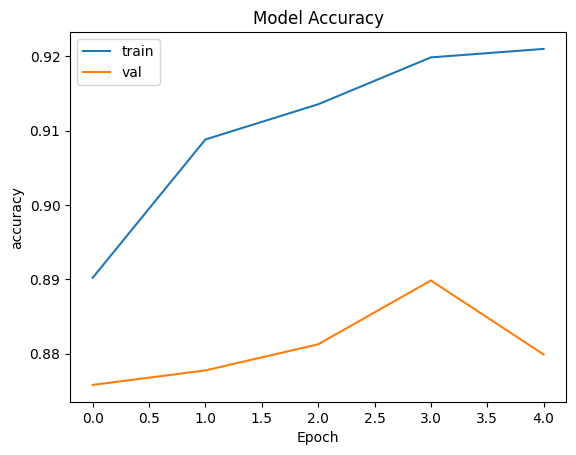

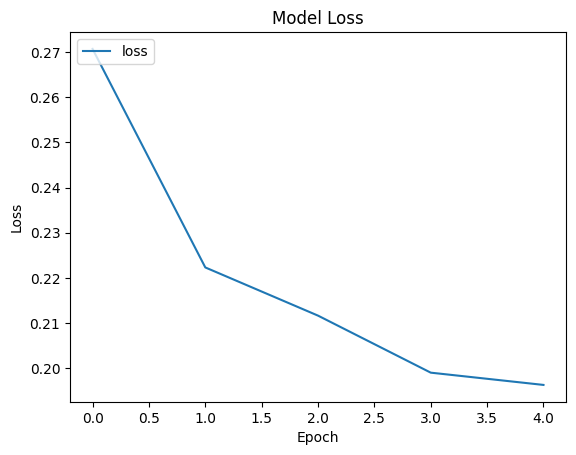

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.legend(['loss'], loc='upper left')
plt.show()

In [21]:
loss_tr, acc_tr = model.evaluate(train_data, verbose=2)
print(acc_tr)
print(loss_tr)

3845/3845 - 731s - loss: 0.1566 - accuracy: 0.9407 - 731s/epoch - 190ms/step
0.9406821131706238
0.15657788515090942


In [19]:
loss_vr, acc_vr = model.evaluate(validation_data, verbose=2)
print(acc_vr)
print(loss_vr)

962/962 - 188s - loss: 0.2755 - accuracy: 0.8800 - 188s/epoch - 196ms/step
0.8800234198570251
0.2754823863506317


In [20]:
loss_test, acc_test = model.evaluate(test_data, verbose=2)
print(acc_tr)
print(loss_tr)

501/501 - 95s - loss: 0.1778 - accuracy: 0.9389 - 95s/epoch - 190ms/step
0.938910186290741
0.15876805782318115


In [ ]:
# Tweaking

In [22]:
# from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [28]:
# model = load_model(f"{model_folder}xception_model0407.h5")

In [23]:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

In [24]:
batchsize = 8
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2, horizontal_flip=True, vertical_flip=True)

train_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(test_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 61516 images belonging to 2 classes.
Found 15378 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


In [25]:
adam = Adam(learning_rate=0.0001)
model.compile(optimizer="Adam", loss='categorical_crossentropy',metrics=['accuracy'])

history_sgd = model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=5)

Epoch 1/5
7689/7689 [==============================] - ETA: 0s - loss: 0.1911 - accuracy: 0.9229
Epoch 1: val_loss improved from 0.27715 to 0.27346, saving model to ./models/xception_model0413.h5
7689/7689 [==============================] - 1031s 134ms/step - loss: 0.1911 - accuracy: 0.9229 - val_loss: 0.2735 - val_accuracy: 0.8835 - lr: 0.0010
Epoch 2/5
7689/7689 [==============================] - ETA: 0s - loss: 0.1872 - accuracy: 0.9244
Epoch 2: val_loss did not improve from 0.27346
7689/7689 [==============================] - 1049s 136ms/step - loss: 0.1872 - accuracy: 0.9244 - val_loss: 0.2802 - val_accuracy: 0.8808 - lr: 0.0010
Epoch 3/5
7689/7689 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.9233
Epoch 3: val_loss did not improve from 0.27346
7689/7689 [==============================] - 1189s 155ms/step - loss: 0.1898 - accuracy: 0.9233 - val_loss: 0.2753 - val_accuracy: 0.8821 - lr: 0.0010
Epoch 4/5
7689/7689 [==============================] - ETA: 0s 

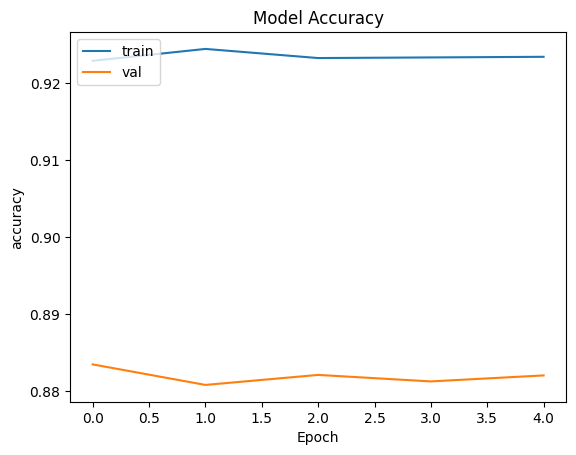

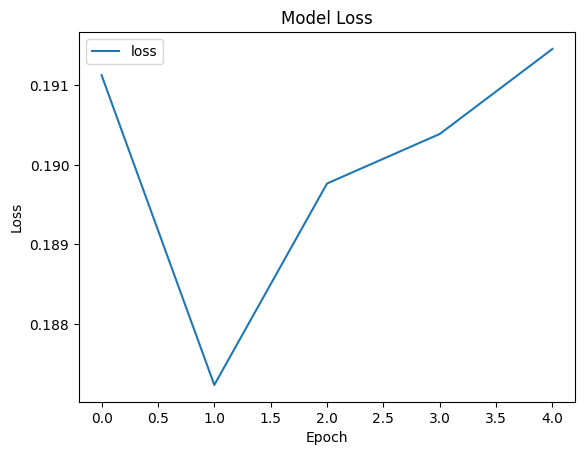

In [26]:
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history_sgd.history['loss'])
plt.legend(['loss'], loc='upper left')
plt.show()

In [27]:
loss_tr, acc_tr = model.evaluate(train_data, verbose=2)
print(acc_tr)
print(loss_tr)

7690/7690 - 746s - loss: 0.1591 - accuracy: 0.9401 - 746s/epoch - 97ms/step
0.940096914768219
0.15907810628414154


In [28]:
loss_vr, acc_vr = model.evaluate(validation_data, verbose=2)
print(acc_vr)
print(loss_vr)

1923/1923 - 204s - loss: 0.2728 - accuracy: 0.8832 - 204s/epoch - 106ms/step
0.883209764957428
0.2727545499801636


In [29]:
loss_test, acc_test = model.evaluate(test_data, verbose=2)
print(acc_tr)
print(loss_tr)

1001/1001 - 115s - loss: 0.1778 - accuracy: 0.9389 - 115s/epoch - 115ms/step
0.940096914768219
0.15907810628414154


In [15]:
!pip3 install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 466.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 144.6 kB/s eta 0:00:00a 0:00:01


In [30]:
from tensorflow.keras.models import load_model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import cv2
# model = load_model(f"{model_folder}xception_model0413.h5")

In [31]:
def image_pred(image):
    eye = cv2.imread(image)
    eye = cv2.resize(eye,(80,80))
    eye = eye/255
    eye = eye.reshape(80,80,3)
    eye = np.expand_dims(eye,axis=0)
    prediction = model.predict(eye)
    return prediction[0]

In [ ]:
open_eyes_ds = os.listdir(test_folder+"/open_eyes/")
close_eyes_ds = os.listdir(test_folder+"/close_eyes/")
y_pred = []
y_test = []
for each in open_eyes_ds:
    each_eye_pred = image_pred(test_folder+"/open_eyes/"+each)
    y_test.append(1)
    if each_eye_pred[0] > each_eye_pred[1]:
        y_pred.append(0)
    else:
        y_pred.append(1)

for each in close_eyes_ds:
    each_eye_pred = image_pred(test_folder+"/close_eyes/"+each)
    y_test.append(0)
    if each_eye_pred[0] > each_eye_pred[1]:
        y_pred.append(0)
    else:
        y_pred.append(1)

print(y_pred)
print(y_test)

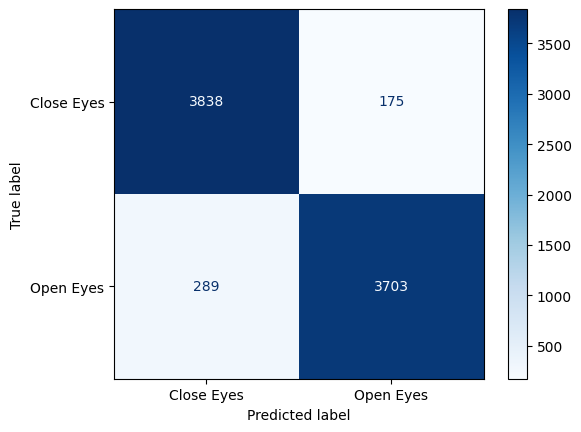

In [33]:
labels = ["Close Eyes", "Open Eyes"]
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()
test_data

In [15]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

8410/8410 [==============================] - 677s 80ms/step - loss: 0.1603 - accuracy: 0.9368
0.16034869849681854
0.9368125200271606


In [40]:
from sklearn.metrics import confusion_matrix

# generate sample confusion matrix
conf_mat = [[3838, 175], 
            [289, 3703]]

# calculate precision for class 1 (index 1)
class_idx0 = 0
TP0 = conf_mat[class_idx0][class_idx0]
FP0 = sum(conf_mat[i][class_idx0] for i in range(len(conf_mat))) - TP0

class_idx1 = 1
TP1 = conf_mat[class_idx1][class_idx1]
FP1 = sum(conf_mat[i][class_idx1] for i in range(len(conf_mat))) - TP1

precision0 = TP0 / (TP0 + FP0)
precision1 = TP1 / (TP1 + FP1)
print("Precision for class ", class_idx0, ": ", precision0)
print("Precision for class ", class_idx1, ": ", precision1)

Precision for class  0 :  0.9299733462563605
Precision for class  1 :  0.9548736462093863


In [35]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  0.9276052104208417


In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9420362273579013


In [37]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)


F1 score:  0.9410419313850064


In [39]:
test_loss, test_accuracy = model.evaluate(test_data, verbose=2)
print(f"Test accuracy:{test_accuracy} and Test Loss: {test_loss}")

1001/1001 - 91s - loss: 0.1778 - accuracy: 0.9389 - 91s/epoch - 90ms/step
Test accuracy:0.9389131665229797 and Test Loss: 0.1778222918510437
